# Parte 1: Preparación de datos

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random
import datetime

## Creación de datos

In [2]:
np.random.seed(42)

n = 300

bimonthly_days = np.arange(0, 60)
base_date = np.datetime64('2017-01-01')
fecha = base_date + np.random.choice(bimonthly_days,size=n)
temperatura = np.random.randint(11,34, size=n)
lluvia_mm = np.random.randint(242,700, size=n)
dia_semana = np.random.choice(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], size=n, p=[0.1,0.1,0.2,0.2,0.1,0.15,0.15])
feriado =np.random.choice([0,1], size=n, p=[0.3,0.7])
promocion = np.random.choice([0,1], size=n, p=[0.1,0.9])
stock_disponible =  np.random.randint(0,100, size=n)
personal_disponible = np.random.randint(15,80, size=n)
atrasos_camiones = np.random.randint(0,4, size=n)
tiempo_promedio_despacho = np.random.randint(0,10, size=n)

## Creación de la probabilida de si hubo altas ventas

In [3]:
prob = (
    0.05 * (temperatura - 20) +
    np.where(dia_semana == 'Miércoles', 0.5,
             np.where(dia_semana == 'Lunes', 0.2, -0.3)) +
    1.2 * promocion -  # Aumenta la probabilidad si es promoción
    0.1 * tiempo_promedio_despacho -  # Reduce la probabilidad a más tiempo de despacho
    0.1 * atrasos_camiones -  # Reduce la probabilidad por camión atrasado
    0.0005 * lluvia_mm -  # Reduce la probabilidad por cada mm de lluvia
    0.002 * feriado +  # Reduce la probabilidad si es feriado
    np.where((dia_semana == 'Jueves') | (dia_semana == 'Miércoles'), 0.4, 0)  # Aumenta la probabilidad si es jueves o miercoles
)

prob = 1 / (1 + np.exp(-prob))
ventas_altas = (np.random.rand(n) < prob).astype(int)


## Creación del DataFrame

In [4]:
df = pd.DataFrame({
    'fecha':fecha,
    'temperatura': temperatura,
    'lluvia_mm': lluvia_mm,
    'dia_semana': dia_semana,
    'feriado' : feriado,
    'stock_disponible': stock_disponible,
    'personal_disponible': personal_disponible,
    'atrasos_camiones': atrasos_camiones,
    'tiempo_promedio_despacho': tiempo_promedio_despacho,
    'ventas_altas': ventas_altas,
    'promocion': promocion
})

## Exploración de datos

In [5]:
print("Encabezados y primeros datos")
print(df.head())
print("\n Información de los datos")
print(df.info())
df.dropna()

Encabezados y primeros datos
       fecha  temperatura  lluvia_mm dia_semana  feriado  stock_disponible  \
0 2017-02-08           11        598     Jueves        0                 7   
1 2017-02-21           19        698     Jueves        1                46   
2 2017-01-29           16        649    Domingo        0                75   
3 2017-01-15           26        433     Jueves        0                90   
4 2017-02-12           13        468     Martes        0                71   

   personal_disponible  atrasos_camiones  tiempo_promedio_despacho  \
0                   19                 3                         8   
1                   79                 0                         7   
2                   44                 2                         9   
3                   35                 2                         9   
4                   36                 3                         0   

   ventas_altas  promocion  
0             0          1  
1             0        

,fecha,temperatura,lluvia_mm,dia_semana,feriado,stock_disponible,personal_disponible,atrasos_camiones,tiempo_promedio_despacho,ventas_altas,promocion
0,2017-02-08,11,598,Jueves,0,7,19,3,8,0,1
1,2017-02-21,19,698,Jueves,1,46,79,0,7,0,1
2,2017-01-29,16,649,Domingo,0,75,44,2,9,1,1
3,2017-01-15,26,433,Jueves,0,90,35,2,9,1,1
4,2017-02-12,13,468,Martes,0,71,36,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
295,2017-01-06,21,500,Domingo,1,83,60,3,6,0,1
296,2017-01-22,14,620,Jueves,1,2,18,0,6,1,1
297,2017-01-11,31,547,Jueves,1,15,74,2,8,1,1
298,2017-02-17,14,509,Lunes,1,29,71,1,6,0,1


# Parte 2: Análisis Exploratorio (EDA) 

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

*Graficos de variables numericas (EDA)*

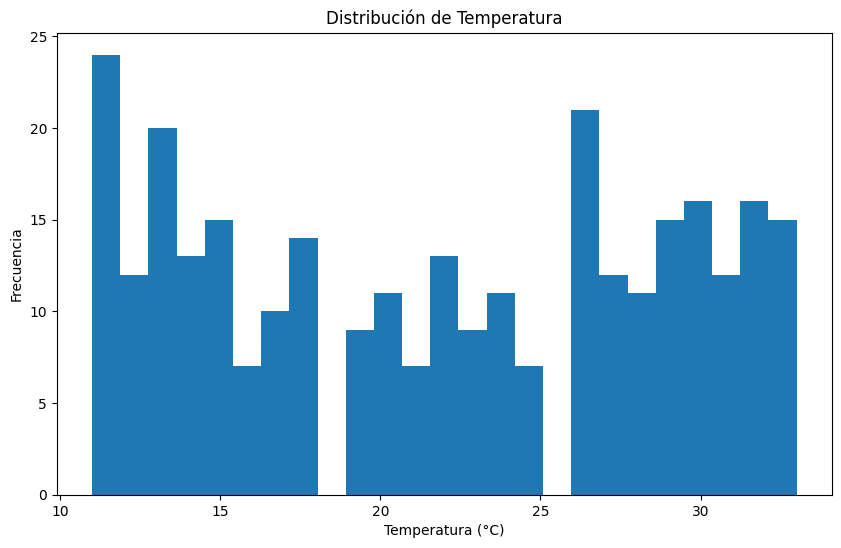

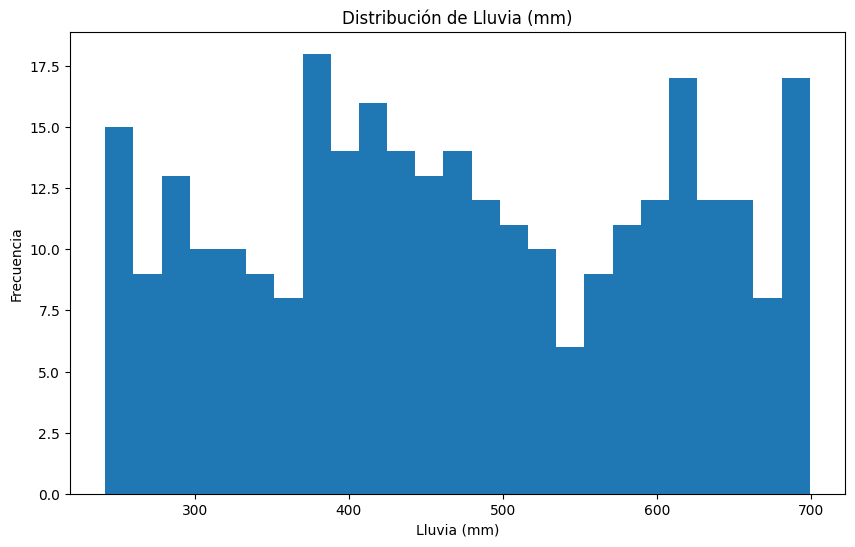

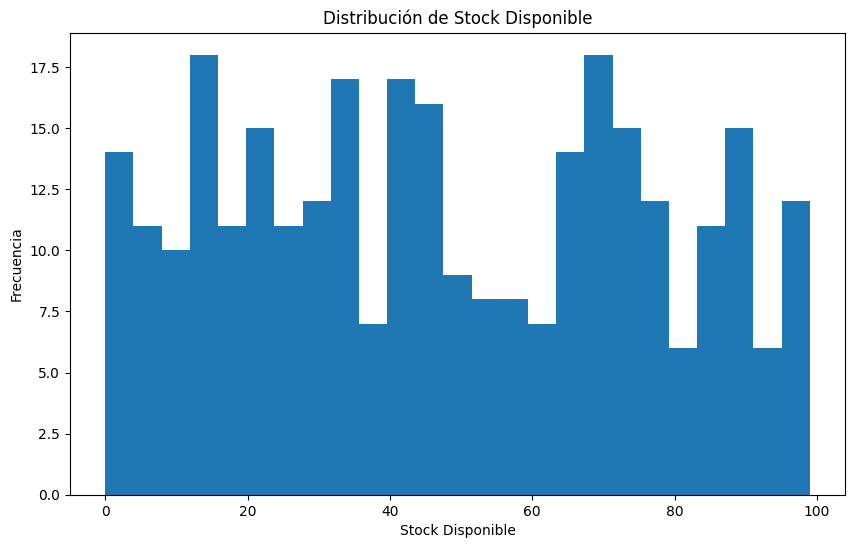

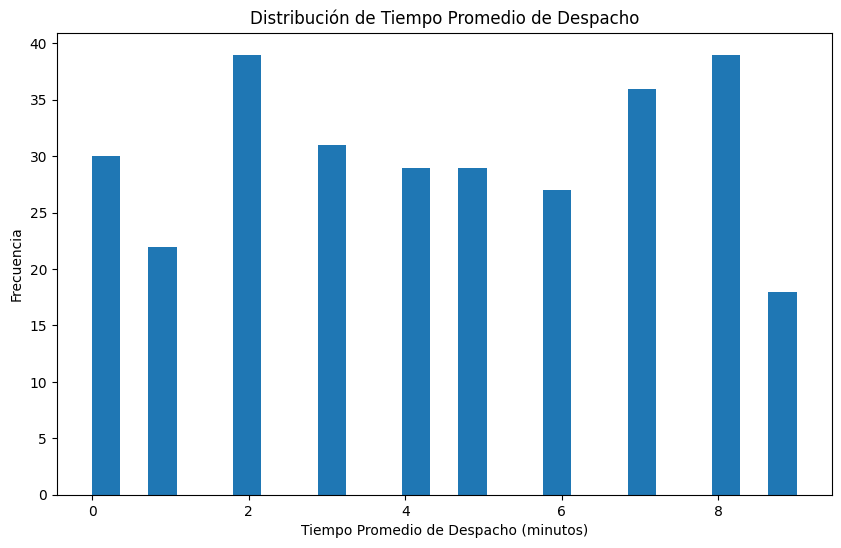

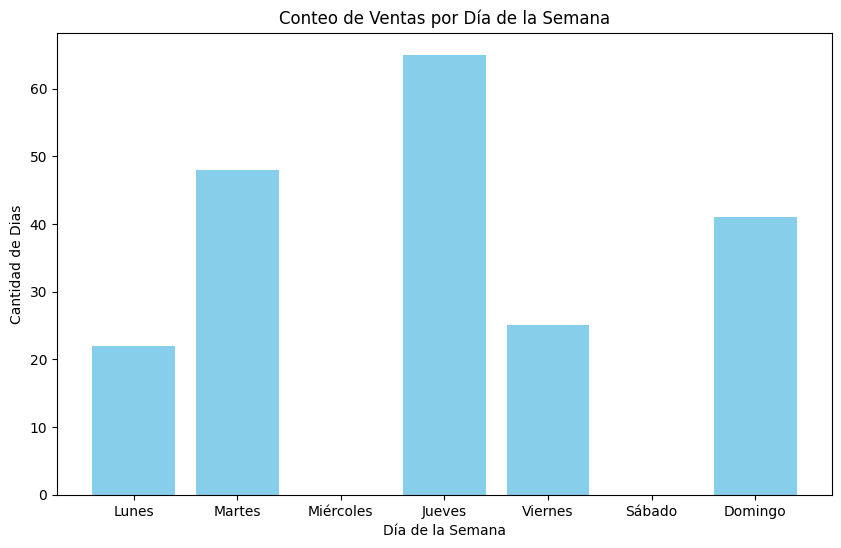

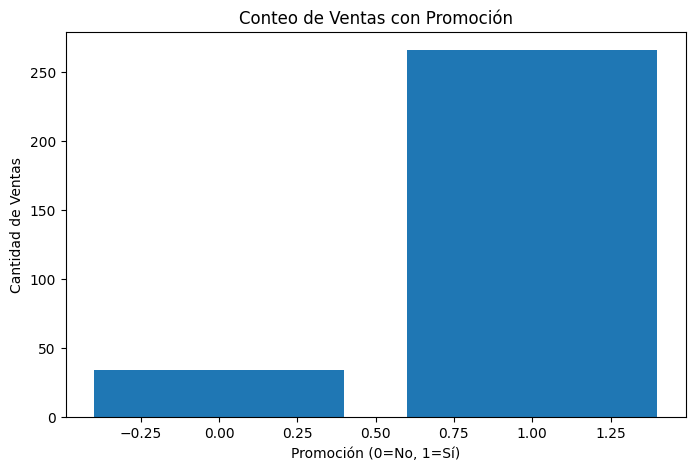

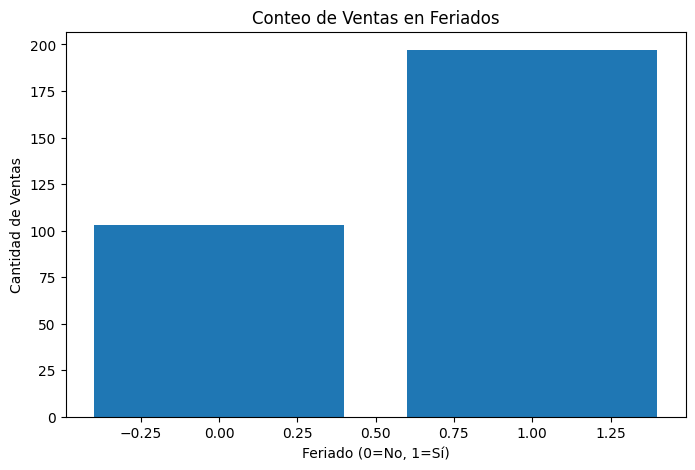

In [7]:
#histograma temperatura
plt.figure(figsize=(10,6))
plt.hist(df['temperatura'], bins=25)
plt.title('Distribución de Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.show()

#Histograma lluvia_mm
plt.figure(figsize=(10,6))
plt.hist(df['lluvia_mm'], bins=25)
plt.title('Distribución de Lluvia (mm)')
plt.xlabel('Lluvia (mm)')
plt.ylabel('Frecuencia')
plt.show()

#Histograma stock_disponible
plt.figure(figsize=(10,6))
plt.hist(df['stock_disponible'], bins=25)
plt.title('Distribución de Stock Disponible')
plt.xlabel('Stock Disponible')
plt.ylabel('Frecuencia')
plt.show()

#histograma de Tiempo de Despacho
plt.figure(figsize=(10,6))
plt.hist(df['tiempo_promedio_despacho'], bins=25)
plt.title('Distribución de Tiempo Promedio de Despacho')
plt.xlabel('Tiempo Promedio de Despacho (minutos)')
plt.ylabel('Frecuencia')
plt.show()


#Graficos de gráficos de conteo para variables categóricas (dia_semana,promocion,feriado)

#Grafico de Barras Dia Semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
conteo_dias = df['dia_semana'].value_counts().reindex(dias_semana)
plt.figure(figsize=(10,6))
plt.bar(conteo_dias.index, conteo_dias.values, color='skyblue')
plt.title('Conteo de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Dias')
plt.show()

#Grafico de Barras Promocion
conteo_promocion = df['promocion'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(conteo_promocion.index, conteo_promocion.values)
plt.title('Conteo de Ventas con Promoción')
plt.xlabel('Promoción (0=No, 1=Sí)')
plt.ylabel('Cantidad de Ventas')
plt.show()

#Grafico de Barras Feriado
conteo_feriado = df['feriado'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(conteo_feriado.index, conteo_feriado.values)
plt.title('Conteo de Ventas en Feriados')
plt.xlabel('Feriado (0=No, 1=Sí)')
plt.ylabel('Cantidad de Ventas')
plt.show()

*Mapa de calor de correlaciones*

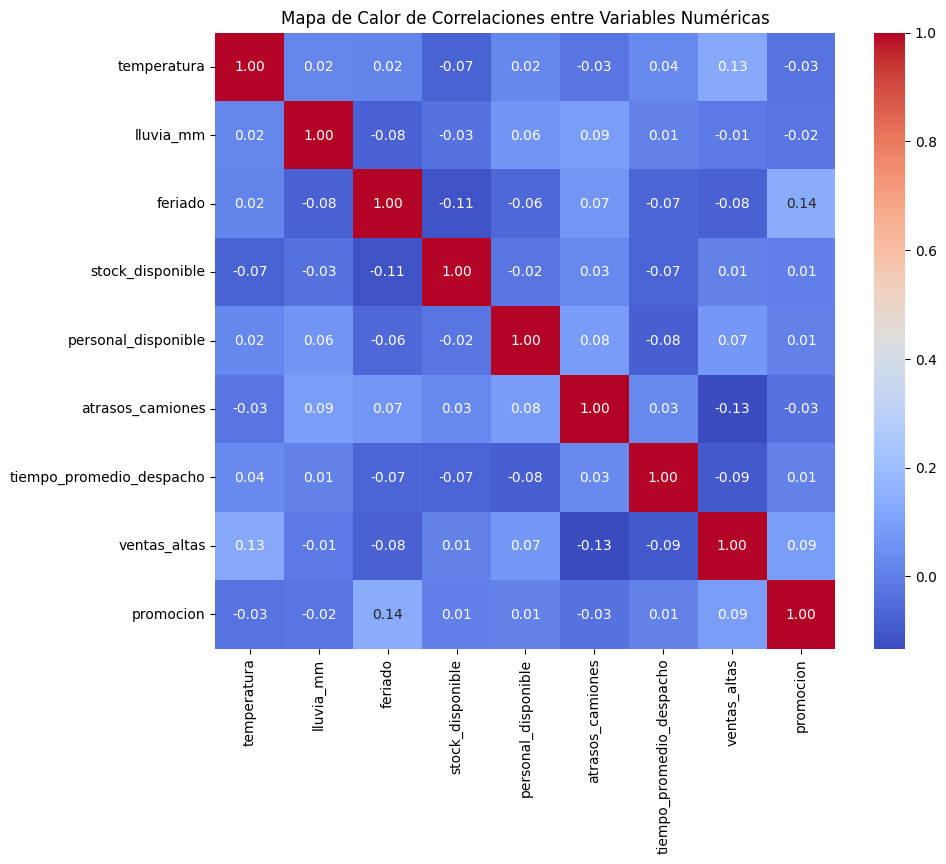

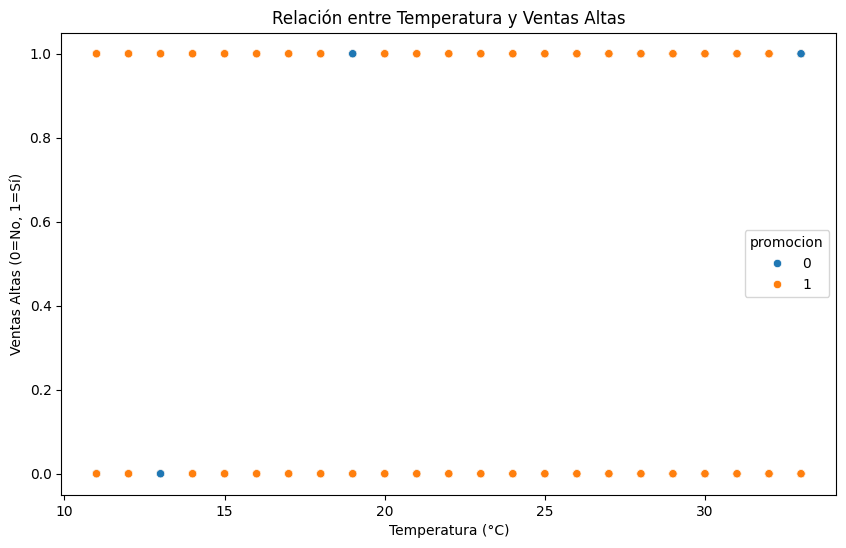

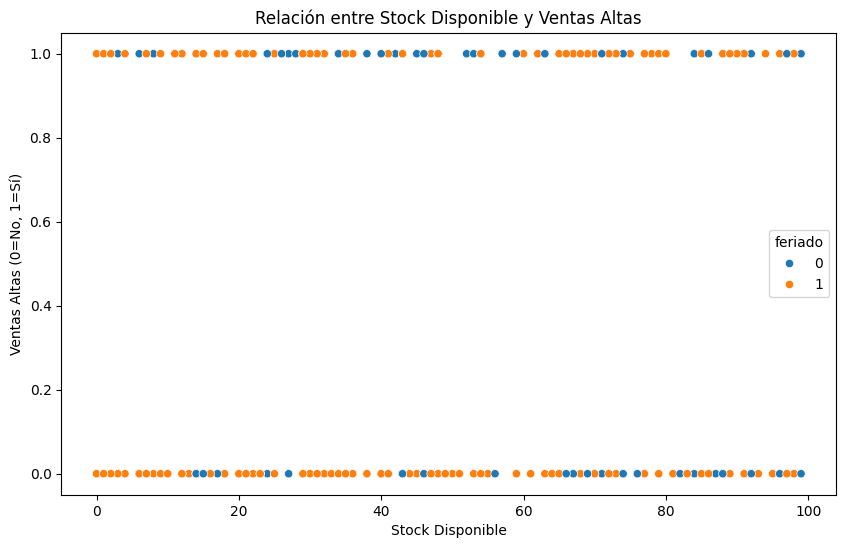

In [8]:
dat_numeric=df.select_dtypes(include=[np.number])
correlation_matrix = dat_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

#Relaciones de Variables Numericas
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='temperatura', y='ventas_altas', hue='promocion')
plt.title('Relación entre Temperatura y Ventas Altas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Ventas Altas (0=No, 1=Sí)')
plt.show() 

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='stock_disponible', y='ventas_altas', hue='feriado')
plt.title('Relación entre Stock Disponible y Ventas Altas')
plt.xlabel('Stock Disponible')
plt.ylabel('Ventas Altas (0=No, 1=Sí)')
plt.show()

# Parte 3: Construcción del Modelo 


In [9]:
x = pd.get_dummies(df.drop(columns = ["ventas_altas"]), columns = ["dia_semana", "fecha"], drop_first = True)
y = df["ventas_altas"]
x.head(10)

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 42, stratify = y)

clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nMatriz de confusion: \n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificacion: \n", classification_report(y_test, y_pred))

Accuracy: 0.573

Matriz de confusion: 
 [[18 21]
 [11 25]]

Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.62      0.46      0.53        39
           1       0.54      0.69      0.61        36

    accuracy                           0.57        75
   macro avg       0.58      0.58      0.57        75
weighted avg       0.58      0.57      0.57        75



# Parte 4: Visualización e Interpretación 

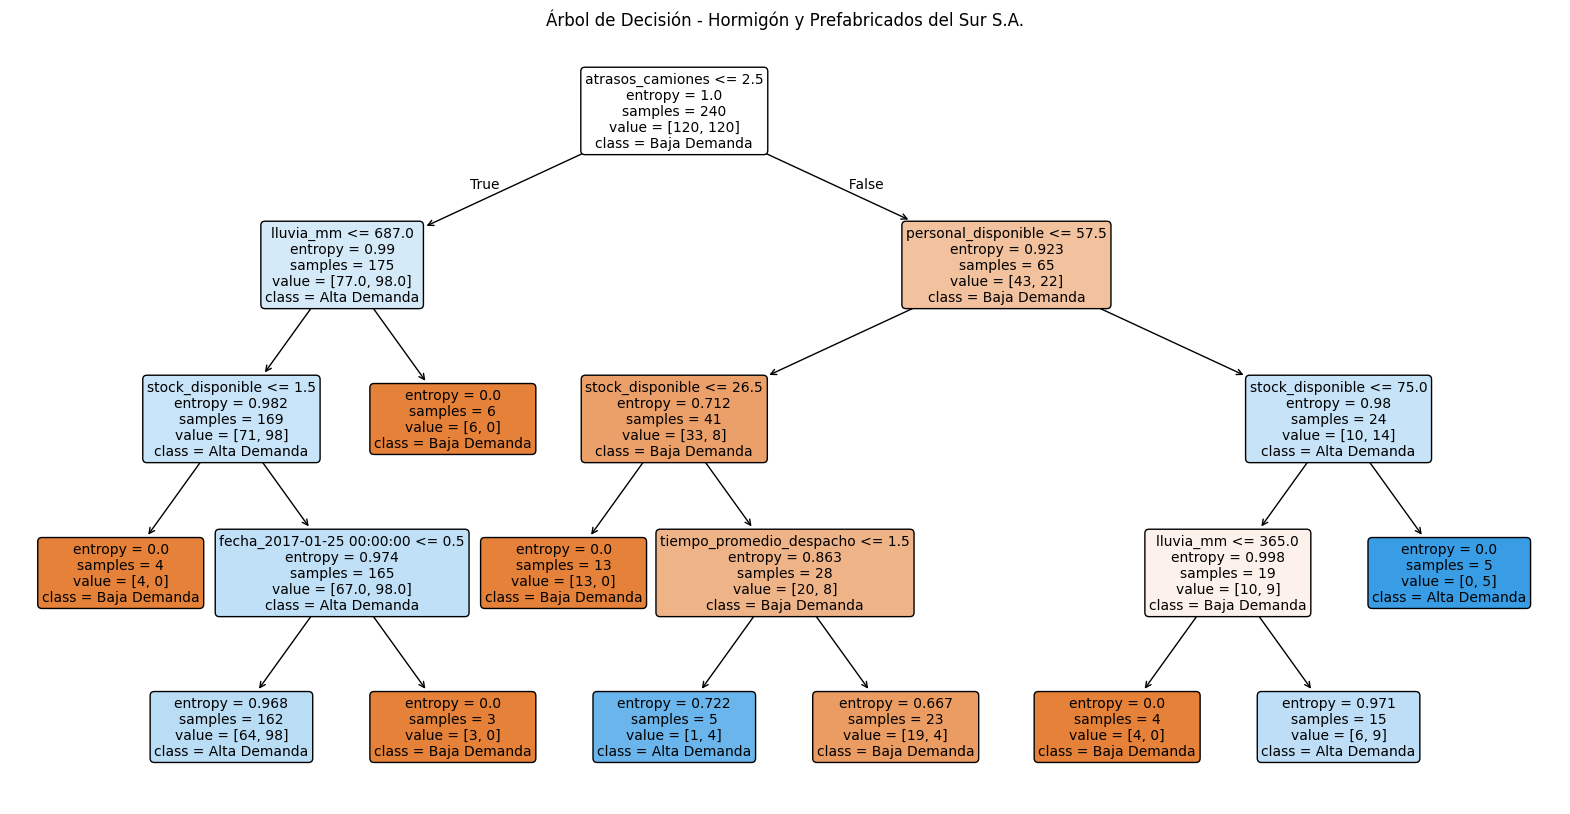

Variables más importantes (más cercanas a la raíz):


,Variable,Importancia
3,stock_disponible,0.295557
1,lluvia_mm,0.235515
4,personal_disponible,0.147050
5,atrasos_camiones,0.136978
6,tiempo_promedio_despacho,0.105201
...,...,...
67,fecha_2017-02-25 00:00:00,0.000000
68,fecha_2017-02-26 00:00:00,0.000000
69,fecha_2017-02-27 00:00:00,0.000000
70,fecha_2017-02-28 00:00:00,0.000000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

modelo = DecisionTreeClassifier(
    criterion="entropy",   
    max_depth=4,           
    random_state=42
)
modelo.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    modelo,
    feature_names=x.columns,
    class_names=["Baja Demanda", "Alta Demanda"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Hormigón y Prefabricados del Sur S.A.")
plt.show()

importancia = pd.DataFrame({
    "Variable": x.columns,
    "Importancia": modelo.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("Variables más importantes (más cercanas a la raíz):")
display(importancia)

# Parte 5: Predicciones y Escenarios Futuros

Escenarios Futuros y Ventas Predichas:


,temperatura,lluvia_mm,dia_semana,feriado,promocion,stock_disponible,personal_disponible,atrasos_camiones,tiempo_promedio_despacho,Ventas_Predichas
0,32,0,Miércoles,0,0,80,18,0,60,Alta Demanda
1,15,25,Lunes,0,1,75,15,5,95,Baja Demanda
2,25,1,Jueves,0,1,95,22,1,45,Alta Demanda
3,28,0,Viernes,1,0,85,16,0,70,Alta Demanda
4,18,5,Martes,0,1,90,20,2,55,Alta Demanda


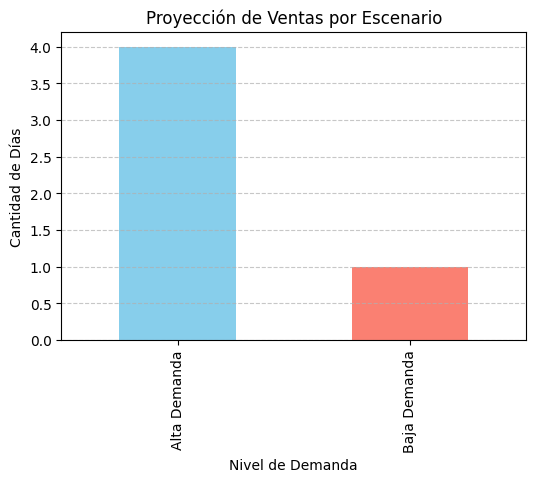

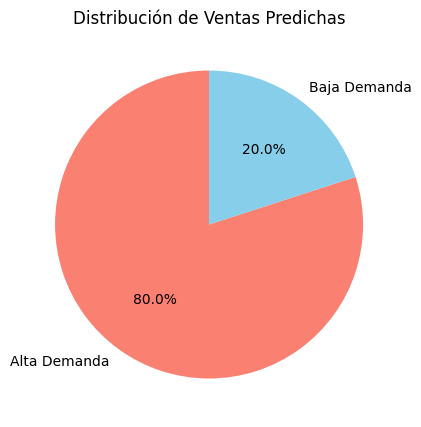

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Crear tabla con escenarios futuros ===
data_escenarios = {
    'temperatura': [32, 15, 25, 28, 18],
    'lluvia_mm': [0, 25, 1, 0, 5],
    'dia_semana': ['Miércoles', 'Lunes', 'Jueves', 'Viernes', 'Martes'],
    'feriado': [0, 0, 0, 1, 0],
    'promocion': [0, 1, 1, 0, 1],
    'stock_disponible': [80, 75, 95, 85, 90],
    'personal_disponible': [18, 15, 22, 16, 20],
    'atrasos_camiones': [0, 5, 1, 0, 2],
    'tiempo_promedio_despacho': [60, 95, 45, 70, 55]
}

# Crear DataFrame
df_escenarios = pd.DataFrame(data_escenarios)
df_escenarios_display = df_escenarios.copy()

# Corregir nombres de días para evitar tildes y compatibilidad
df_escenarios['dia_semana'] = df_escenarios['dia_semana'].replace({
    'Miércoles': 'Miercoles',
    'Sábado': 'Sabado'
})

#Preprocesar igual que los datos de entrenamiento
df_escenarios_procesado = pd.get_dummies(df_escenarios, columns=['dia_semana'], drop_first=True)

# Alinear columnas con las del modelo
df_X_pred = df_escenarios_procesado.reindex(columns=modelo.feature_names_in_, fill_value=0)

#modelo para predecir ventas 
predicciones = modelo.predict(df_X_pred)

mapa_ventas = {1: 'Alta Demanda', 0: 'Baja Demanda'}
ventas_predichas_str = [mapa_ventas[p] for p in predicciones]
df_escenarios_display['Ventas_Predichas'] = ventas_predichas_str

# Mostrar resultados
print("Escenarios Futuros y Ventas Predichas:")
display(df_escenarios_display)

#Visualización de resultados
conteo = df_escenarios_display['Ventas_Predichas'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
conteo.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proyección de Ventas por Escenario')
plt.xlabel('Nivel de Demanda')
plt.ylabel('Cantidad de Días')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de pastel
plt.figure(figsize=(5, 5))
conteo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Distribución de Ventas Predichas')
plt.ylabel('')
plt.show()

### **Conclusión Técnica**
El modelo de árbol de decisión indica que las variables más influyentes son la **temperatura**, las **promociones** y el **stock disponible**.  
Los días cálidos y con promociones tienden a generar una mayor probabilidad de **ventas altas**.


### **Recomendación Estratégica para la Gerencia**
Se recomienda **planificar promociones** y **reforzar el personal** en días de mayor temperatura y con alto stock disponible.  
Asimismo, mantener una **logística eficiente** para evitar atrasos en camiones durante estos días de alta demanda.
